In [1]:
import h5py
import numpy as np

In [11]:
f = h5py.File("./test_no_pile_5000000.h5",'r')
[i for i in f]
# treeArray = f['features'][()]
# len(treeArray[:,0])



['features', 'targets']

In [45]:
def isinteger(x):
    return np.equal(np.mod(x, 1), 0)

def within(v, lm):
    return (lm[0]<=v)&(v<lm[1])
    
def matrix_rep(a, bins=32, R = 0.4, limit = False):
    if (not limit):
        limit = np.array((-R,R))
    else:
        limit = np.array(limit)
        
    if (not isinteger(np.log2(bins))):
        print("You should use 2^n bins for integer n ")
    
    dl = (limit[1]-limit[0])/bins
    
    matrix = [] 
    for k in a:
        b = bins
        vlb  = limit[0]
        vub = limit[1]
        if not within(k, limit):
            matrix.append(-1)
        else:
            while(b!=1):
                b = b//2
                r1 = (vlb, (vlb+vub)/2)
                r2 = ((vlb+vub)/2, vub)
                if within(k,r1):
                    vub = (vlb+vub)/2
                if within(k,r2):
                    vlb = (vlb+vub)/2
                if b==1:
                    matrix.append((vlb-limit[0])/dl)
                    break
    return matrix
            
            
            
    
    
    
    
    
        
    

In [25]:
# prepare array to  store data
targets = f['targets'][()]
features = f['features'][()]
j0 = np.array([features[i] for i in range(len(features)) if targets[i]==0])
j1 = np.array([features[i] for i in range(len(features)) if targets[i]==1])

In [26]:
j0[:,0]

array([17.1676, 52.9099, 22.9799, ..., 43.7291, 34.513 , 18.5032],
      dtype=float32)

In [21]:
import matplotlib.pyplot as plt

<Figure size 576x576 with 0 Axes>

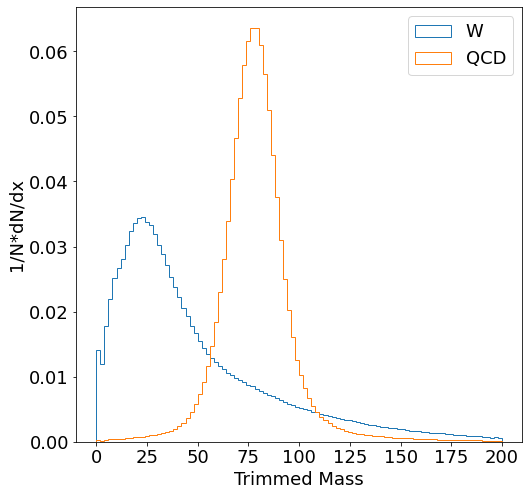

In [119]:
## Plot high level features
label = ['Trimmed Mass', '${{C_2}^{\u03B2=1}}$', '${{C_2}^{\u03B2=2}}$', '${{D_2}^{\u03B2=1}}$', '${{D_2}^{\u03B2=2}}$', '${{\u03C4_{21}}^{\u03B2=1}}$']
inv = [200, 0.5, 0.2, 5, 5, 1]
plt.figure(figsize=(8,8))
n = 0
W = j0[:,n]*0+1/len(j0[:,n])
bins = 100
fs=18
tagsize = 18
plt.figure(figsize=(8,8))
bins2 = 60
x1, x2 = 0, inv[n]
# plt.subplot(1,4,1)
plt.hist(j0[:,n],bins=bins, histtype='step', weights = W, range=[x1, x2], label='W')
plt.hist(j1[:,n],bins=bins, histtype='step', weights = W, range=[x1, x2], label='QCD')

plt.legend(prop={'size': tagsize})
# plt.legend()
# plt.yscale('log') 
plt.xlabel(label[n], fontsize=fs)  
plt.ylabel("1/N*dN/dx", fontsize=fs)  
plt.xticks(fontsize=fs)   
plt.yticks(fontsize=fs)
plt.savefig("./jet_highlevel_features_density_"+str(n)+".png")

In [123]:
f2 = h5py.File("./test2_no_pile_5000000.h5",'r')
[i for i in f2]

['features', 'targets']

In [124]:
targets2 = f2['targets'][()]
features2 = f2['features'][()]
j20 = np.array([features2[i] for i in range(len(features2)) if targets2[i]==0])
j21 = np.array([features2[i] for i in range(len(features2)) if targets2[i]==1])

In [144]:
X = np.sum(j20, axis=0)
Y = np.sum(j21, axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


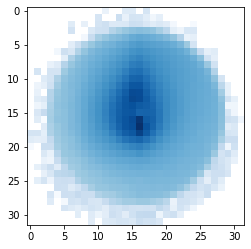

In [156]:
plt.imshow(np.log(X[0]), cmap='Blues', label = 'W')
plt.savefig("./jet_image_W.png")
plt.imshow(np.log(Y[0]), cmap='Blues', label = 'QCD')
plt.savefig("./jet_image_QCD.png")